# lab5

In [106]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
plt.rcParams["figure.figsize"] = (10,8)

# import library
import pickle

choice:
   data family: LHC particle physics data <br /> 
   specific data: set1

In [107]:
# open the file of interest, and use pickle loading
infile1 = open ("higgs_100000_pt_250_500.pkl",'rb')
new_dict1 = pickle.load(infile1)
infile2 = open ("qcd_100000_pt_250_500.pkl",'rb')
new_dict2 = pickle.load(infile2)

In [108]:
# list all keys of the file1
new_dict1.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [109]:
# list all keys of the file2
new_dict2.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [110]:
# import data into array variable
higgs_data = np.array(new_dict1)
qcd_data = np.array(new_dict2)

In [111]:
# a brief table of the higgs data
table1 = pd.DataFrame(higgs_data)
table1.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
table1

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,478.658254,-0.837586,-2.609921,125.707302,0.138041,0.001494,0.567994,0.000953,1.192189,0.131294,0.109689,0.110129,0.835446,0.504678
99996,465.171259,0.429341,-1.446681,129.749906,0.135890,0.002071,0.825176,0.005110,0.751448,0.140336,0.115123,0.186755,0.820334,0.586032
99997,466.920808,-0.805493,-0.754703,49.069161,0.020281,0.000121,14.506839,0.004768,0.864723,0.568722,0.395942,0.657693,0.696196,0.018073
99998,471.611853,0.801813,-3.077883,117.186361,0.102276,0.002399,2.242231,0.006947,0.759346,0.318427,0.274153,0.419343,0.860960,0.641892


In [112]:
# a brief table of the qcd data
table2 = pd.DataFrame(qcd_data)
table2.columns = [ 'pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']
table2

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481
2,447.487556,1.861736,-2.326646,85.794174,0.069372,0.001375,4.118371,0.000197,0.979133,0.815123,0.700152,0.832495,0.858953,0.117091
3,402.652836,1.276421,-1.124176,42.947328,0.032095,0.000266,8.038338,0.001144,1.020193,0.664347,0.617499,0.651197,0.929482,0.054606
4,484.257672,-1.272225,1.966794,59.542227,0.038348,0.000358,6.353842,0.001619,0.875408,0.436270,0.376816,0.498362,0.863723,0.095201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,418.171225,1.804938,-1.555512,67.399102,0.047555,0.000669,6.216951,0.000335,0.794253,0.734325,0.533141,0.924548,0.726028,0.039376
99996,492.119236,-0.037258,0.037888,90.775772,0.095329,0.001090,1.258409,0.005327,0.849051,0.285315,0.177652,0.336041,0.622651,0.321335
99997,492.932552,-0.912632,0.578690,106.611253,0.078793,0.002331,4.764786,0.004449,0.951293,0.789768,0.620329,0.830205,0.785457,0.053165
99998,402.673975,-1.736921,-2.103913,66.278542,0.066585,0.000851,2.881152,0.000324,0.831466,0.488685,0.429960,0.587739,0.879831,0.212806


## initial write-up of the data:

LHC is the simulated data from the particle accelerator <br />
Goal: finding cuts that maximize sensitivity <br /> <br />
"higgs" -- signal dataset <br />
"qcd" -- background dataset <br /><br />
The understandings of each column: <br />
    1) pt: transverse momentum <br />
    2) eta: angle to the beam axis, y-z plane <br />
    3) phi: azimuthal angle, x-y plane <br />
    4) mass: the mass of Irrelevant objects<br />
    5) ee2: energy correlation function (ECF) ratio for 2-point correlators <br />
    6) ee3: energy correlation function (ECF) ratio for 3-point correlators <br />
    7) d2: ee3/(ee2)^3 <br />
    8) angularity: <br />
    9-13) t1,t2,t3,t21,t32:tx,x-subjettiness <br />
    sum up the angular distance to nearest subject axis <br />
    14) KtDeltaR:values of delta R <br />

## explore the data

### histograms of each column

In [113]:
higgs_data[:,0]

array([472.07429171, 470.40567818, 438.00835698, ..., 466.92080823,
       471.61185329, 467.02990593])

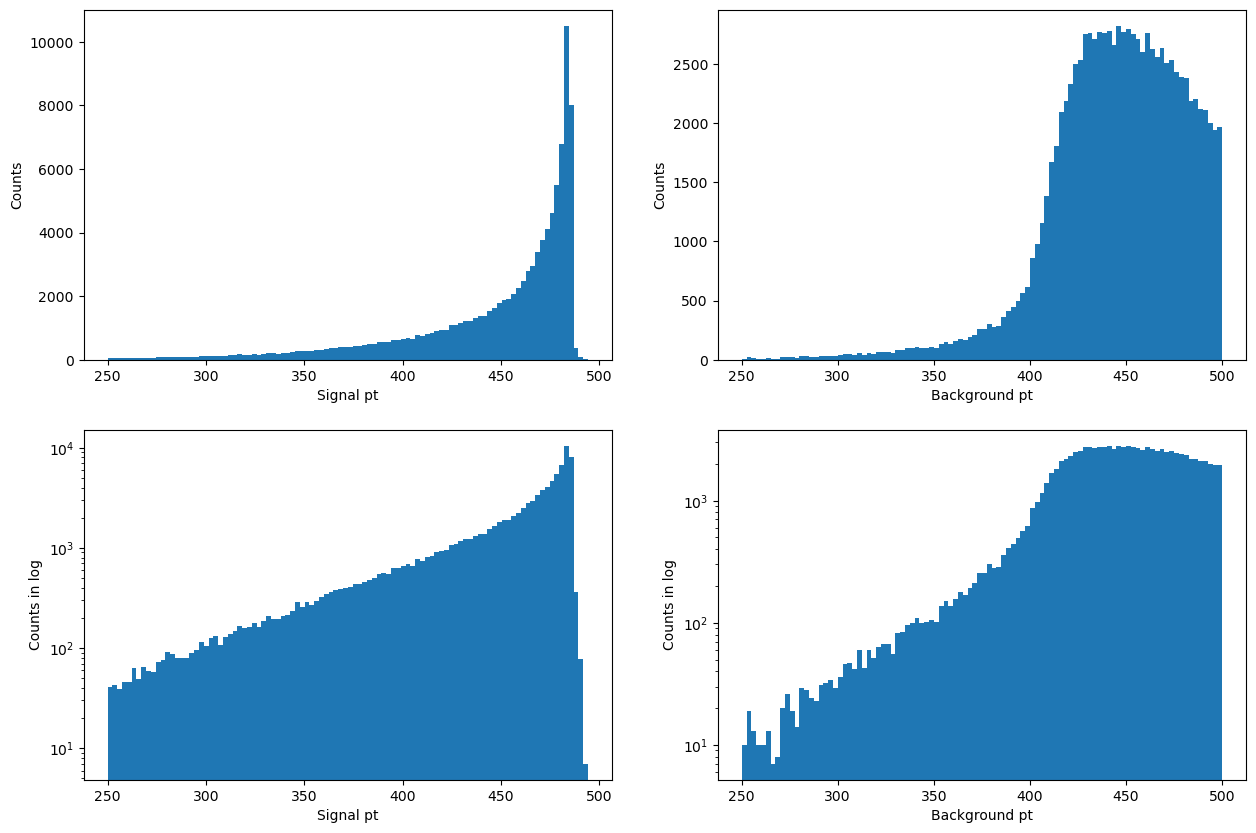

In [114]:
# first column -- pt

fig, a = plt.subplots(2, 2, figsize = (15, 10))
# histogram of signal
a[0,0].hist(higgs_data[:,0], bins = 100)
a[0,0].set_xlabel('Signal pt')
a[0,0].set_ylabel('Counts')
# histogram of background
a[0,1].hist(qcd_data[:,0], bins = 100)
a[0,1].set_xlabel('Background pt')
a[0,1].set_ylabel('Counts')
# log histogram of signal
a[1,0].hist(higgs_data[:,0], bins = 100)
a[1,0].set_xlabel('Signal pt')
a[1,0].set_yscale('log')
a[1,0].set_ylabel('Counts in log')
# log histogram of background
a[1,1].hist(qcd_data[:,0], bins = 100)
a[1,1].set_xlabel('Background pt')
a[1,1].set_yscale('log')
a[1,1].set_ylabel('Counts in log')

plt.show()


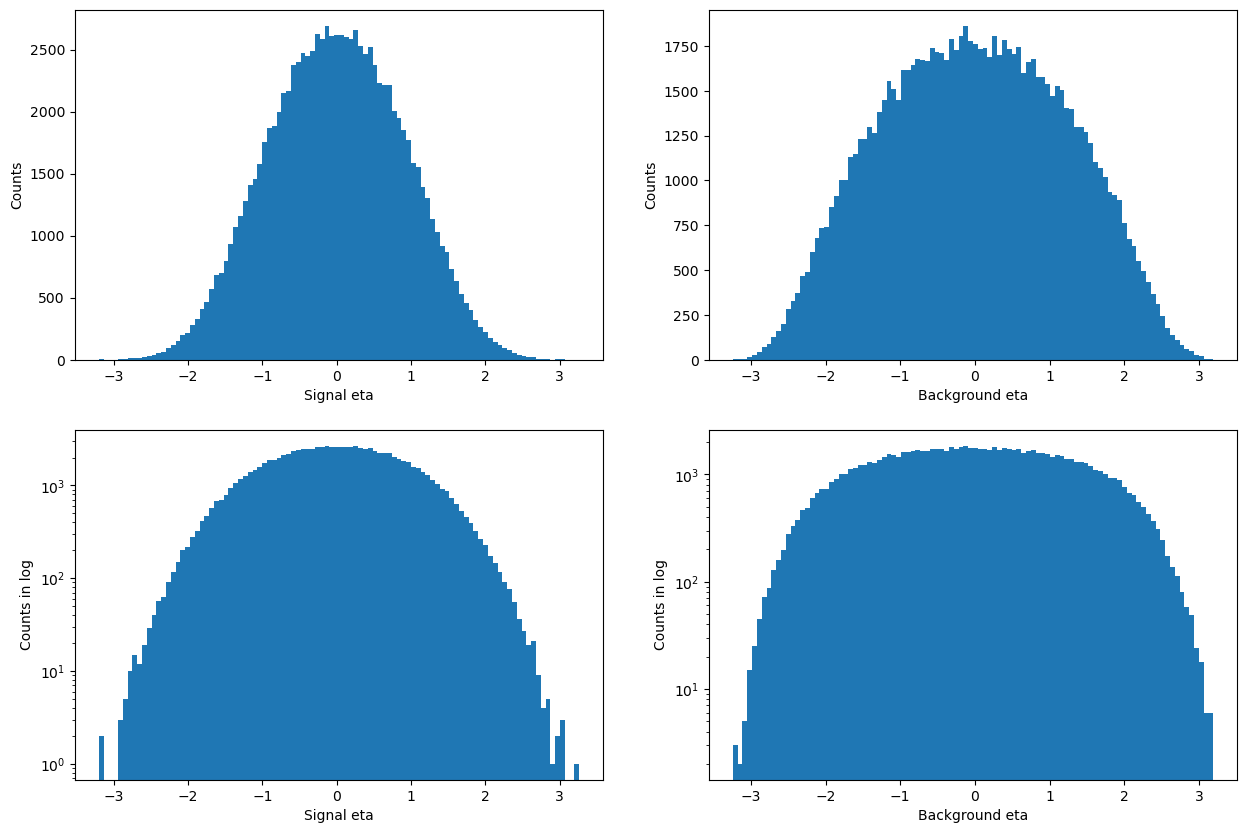

In [115]:
# second column -- eta

fig, a = plt.subplots(2, 2, figsize = (15, 10))
# histogram of signal
a[0,0].hist(higgs_data[:,1], bins = 100)
a[0,0].set_xlabel('Signal eta')
a[0,0].set_ylabel('Counts')
# histogram of background
a[0,1].hist(qcd_data[:,1], bins = 100)
a[0,1].set_xlabel('Background eta')
a[0,1].set_ylabel('Counts')
# log histogram of signal
a[1,0].hist(higgs_data[:,1], bins = 100)
a[1,0].set_xlabel('Signal eta')
a[1,0].set_yscale('log')
a[1,0].set_ylabel('Counts in log')
# log histogram of background
a[1,1].hist(qcd_data[:,1], bins = 100)
a[1,1].set_xlabel('Background eta')
a[1,1].set_yscale('log')
a[1,1].set_ylabel('Counts in log')

plt.show()

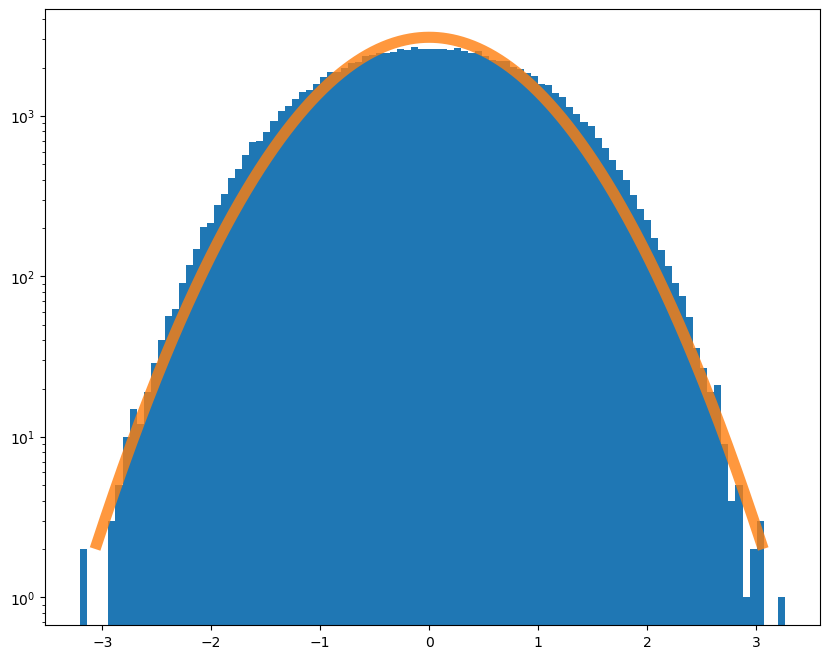

In [116]:
# especially explore the eta data distribution

fig, ax = plt.subplots(1, 1)
ax.hist(higgs_data[:,1], bins = 100)
plt.yscale('log')
x = np.linspace(-3.05,3.05,1000)
ax.plot(x,stats.norm.pdf(x,loc = 0., scale = 0.8)*6200,linewidth = 8,alpha = 0.8)
plt.show()

# the distribution is close to the Guassian distribution

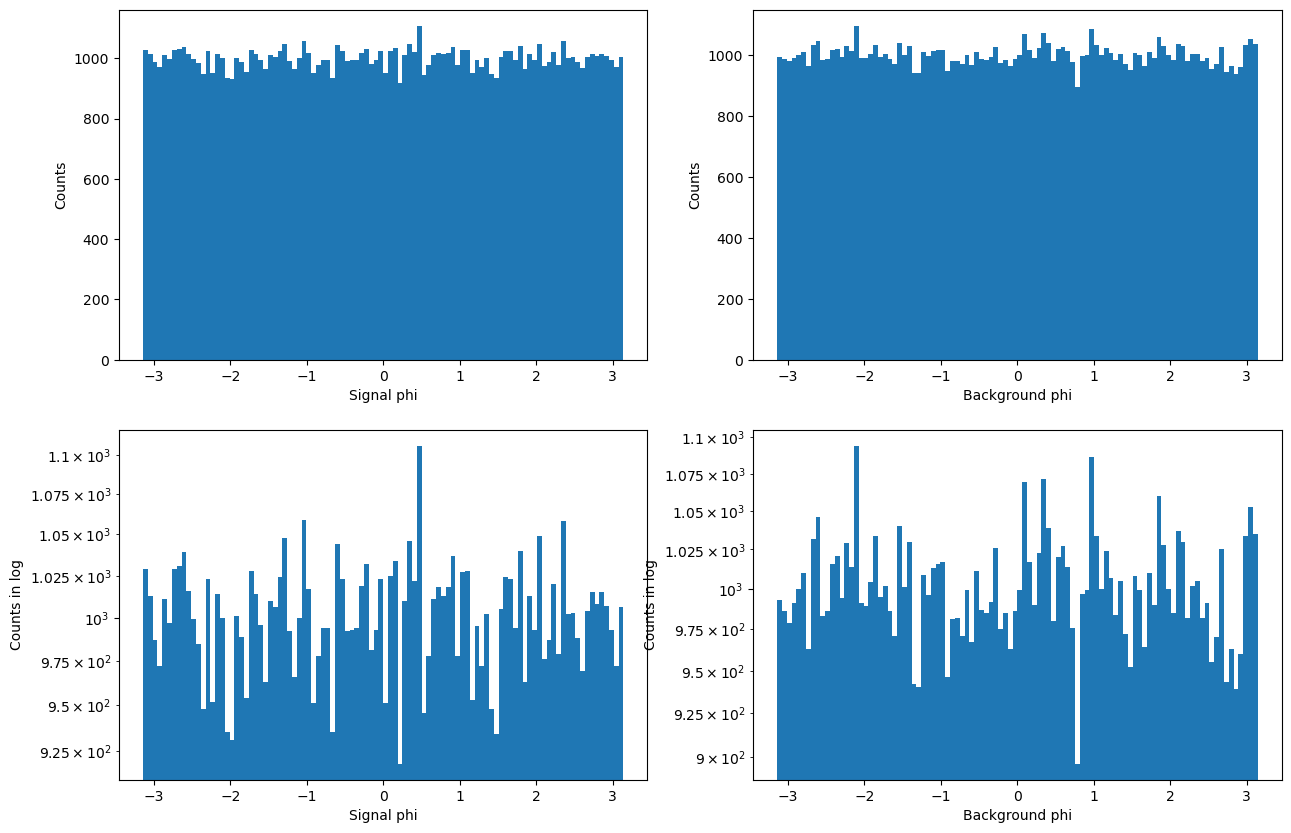

In [117]:
# third column -- phi

fig, a = plt.subplots(2, 2, figsize = (15, 10))
# histogram of signal
a[0,0].hist(higgs_data[:,2], bins = 100)
a[0,0].set_xlabel('Signal phi')
a[0,0].set_ylabel('Counts')
# histogram of background
a[0,1].hist(qcd_data[:,2], bins = 100)
a[0,1].set_xlabel('Background phi')
a[0,1].set_ylabel('Counts')
# log histogram of signal
a[1,0].hist(higgs_data[:,2], bins = 100)
a[1,0].set_xlabel('Signal phi')
a[1,0].set_yscale('log')
a[1,0].set_ylabel('Counts in log')
# log histogram of background
a[1,1].hist(qcd_data[:,2], bins = 100)
a[1,1].set_xlabel('Background phi')
a[1,1].set_yscale('log')
a[1,1].set_ylabel('Counts in log')

plt.show()

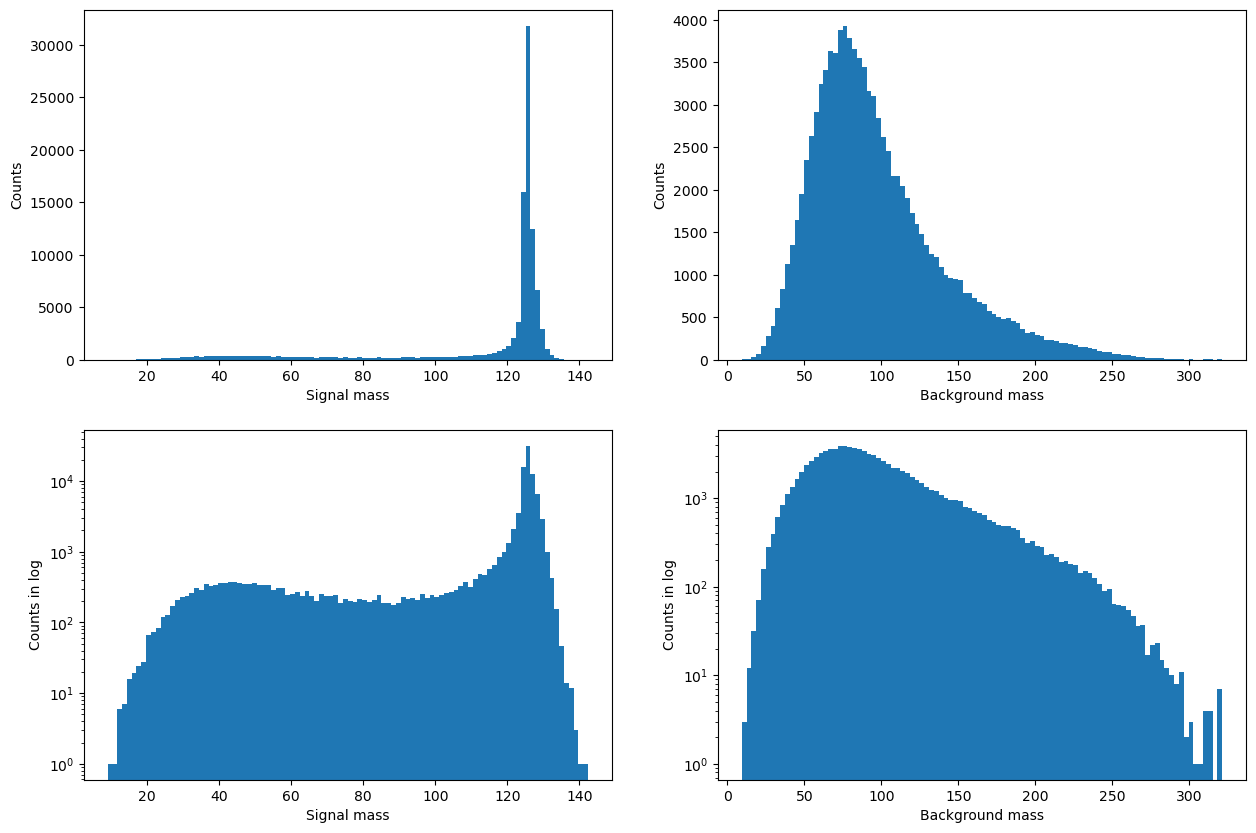

In [118]:
# fourth column -- mass

fig, a = plt.subplots(2, 2, figsize = (15, 10))
# histogram of signal
a[0,0].hist(higgs_data[:,3], bins = 100)
a[0,0].set_xlabel('Signal mass')
a[0,0].set_ylabel('Counts')
# histogram of background
a[0,1].hist(qcd_data[:,3], bins = 100)
a[0,1].set_xlabel('Background mass')
a[0,1].set_ylabel('Counts')
# log histogram of signal
a[1,0].hist(higgs_data[:,3], bins = 100)
a[1,0].set_xlabel('Signal mass')
a[1,0].set_yscale('log')
a[1,0].set_ylabel('Counts in log')
# log histogram of background
a[1,1].hist(qcd_data[:,3], bins = 100)
a[1,1].set_xlabel('Background mass')
a[1,1].set_yscale('log')
a[1,1].set_ylabel('Counts in log')

plt.show()

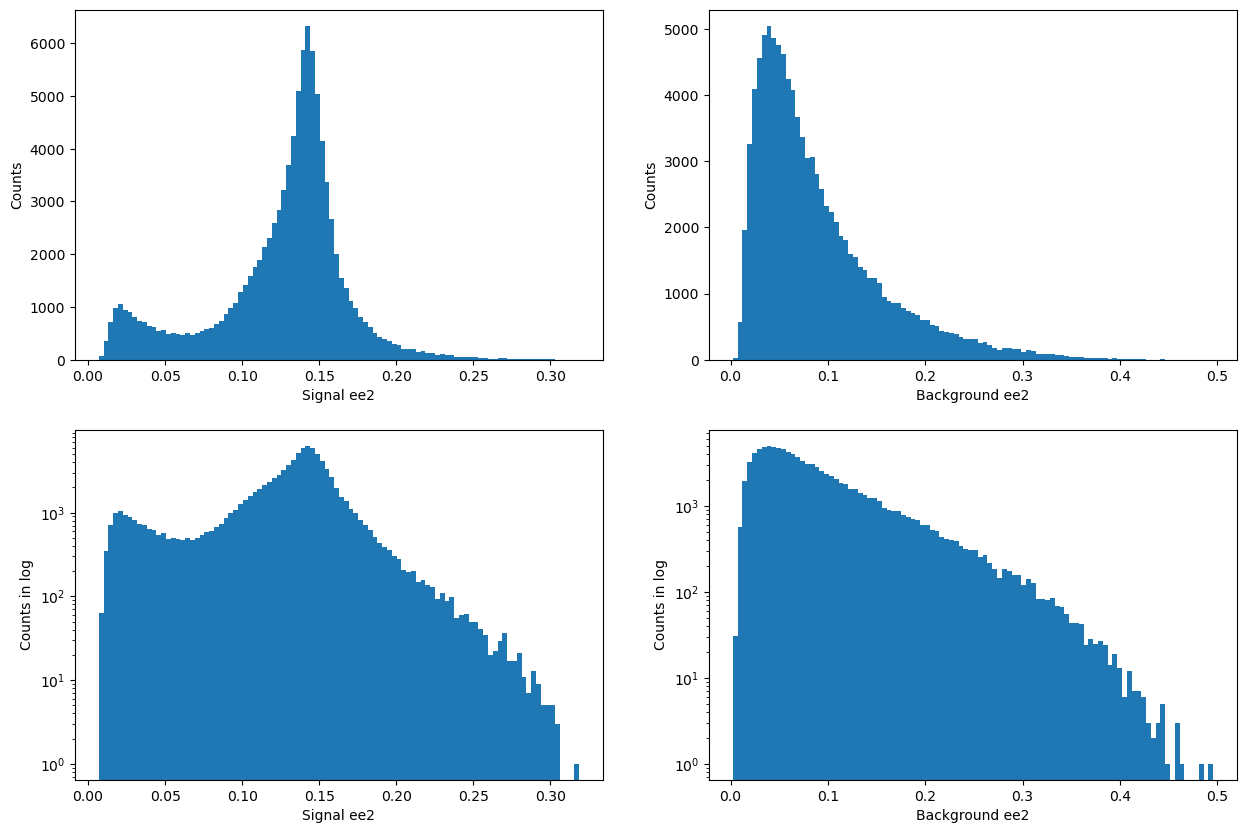

In [119]:
# fifth column -- ee2

fig, a = plt.subplots(2, 2, figsize = (15, 10))
# histogram of signal
a[0,0].hist(higgs_data[:,4], bins = 100)
a[0,0].set_xlabel('Signal ee2')
a[0,0].set_ylabel('Counts')
# histogram of background
a[0,1].hist(qcd_data[:,4], bins = 100)
a[0,1].set_xlabel('Background ee2')
a[0,1].set_ylabel('Counts')
# log histogram of signal
a[1,0].hist(higgs_data[:,4], bins = 100)
a[1,0].set_xlabel('Signal ee2')
a[1,0].set_yscale('log')
a[1,0].set_ylabel('Counts in log')
# log histogram of background
a[1,1].hist(qcd_data[:,4], bins = 100)
a[1,1].set_xlabel('Background ee2')
a[1,1].set_yscale('log')
a[1,1].set_ylabel('Counts in log')

plt.show()

(0.0, 5290.95)

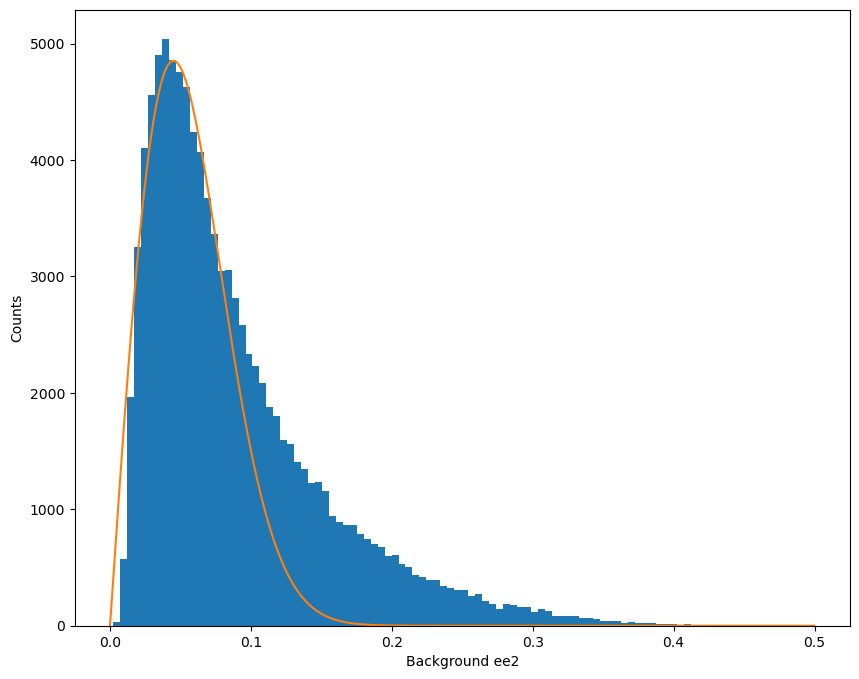

In [120]:
# one more special exploration to the background ee2
fig, ax = plt.subplots(1, 1)
# histogram of background
ax.hist(qcd_data[:,4], bins = 100)
ax.set_xlabel('Background ee2')
ax.set_ylabel('Counts')
#try the Rayleigh distribution
dist = stats.rayleigh(scale = 0.045) #create a new Rayleigh distribution
x = np.linspace (0,0.5,1000) #range of x values
pdf =  dist.pdf(x)
plt.plot(x, pdf*360)
plt.ylim(0)
# very similar, just some differences at the position of tail

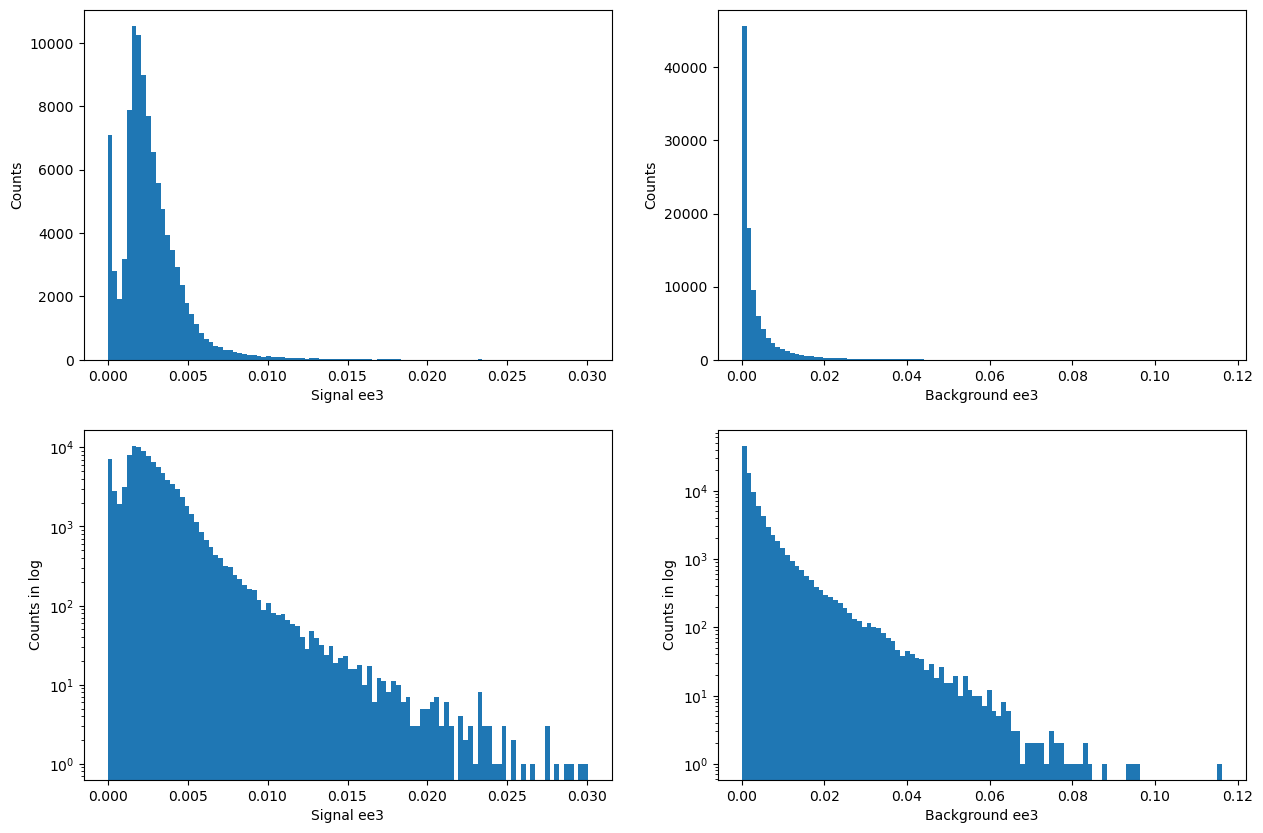

In [121]:
# sixth column -- ee3

fig, a = plt.subplots(2, 2, figsize = (15, 10))
# histogram of signal
a[0,0].hist(higgs_data[:,5], bins = 100)
a[0,0].set_xlabel('Signal ee3')
a[0,0].set_ylabel('Counts')
# histogram of background
a[0,1].hist(qcd_data[:,5], bins = 100)
a[0,1].set_xlabel('Background ee3')
a[0,1].set_ylabel('Counts')
# log histogram of signal
a[1,0].hist(higgs_data[:,5], bins = 100)
a[1,0].set_xlabel('Signal ee3')
a[1,0].set_yscale('log')
a[1,0].set_ylabel('Counts in log')
# log histogram of background
a[1,1].hist(qcd_data[:,5], bins = 100)
a[1,1].set_xlabel('Background ee3')
a[1,1].set_yscale('log')
a[1,1].set_ylabel('Counts in log')

plt.show()

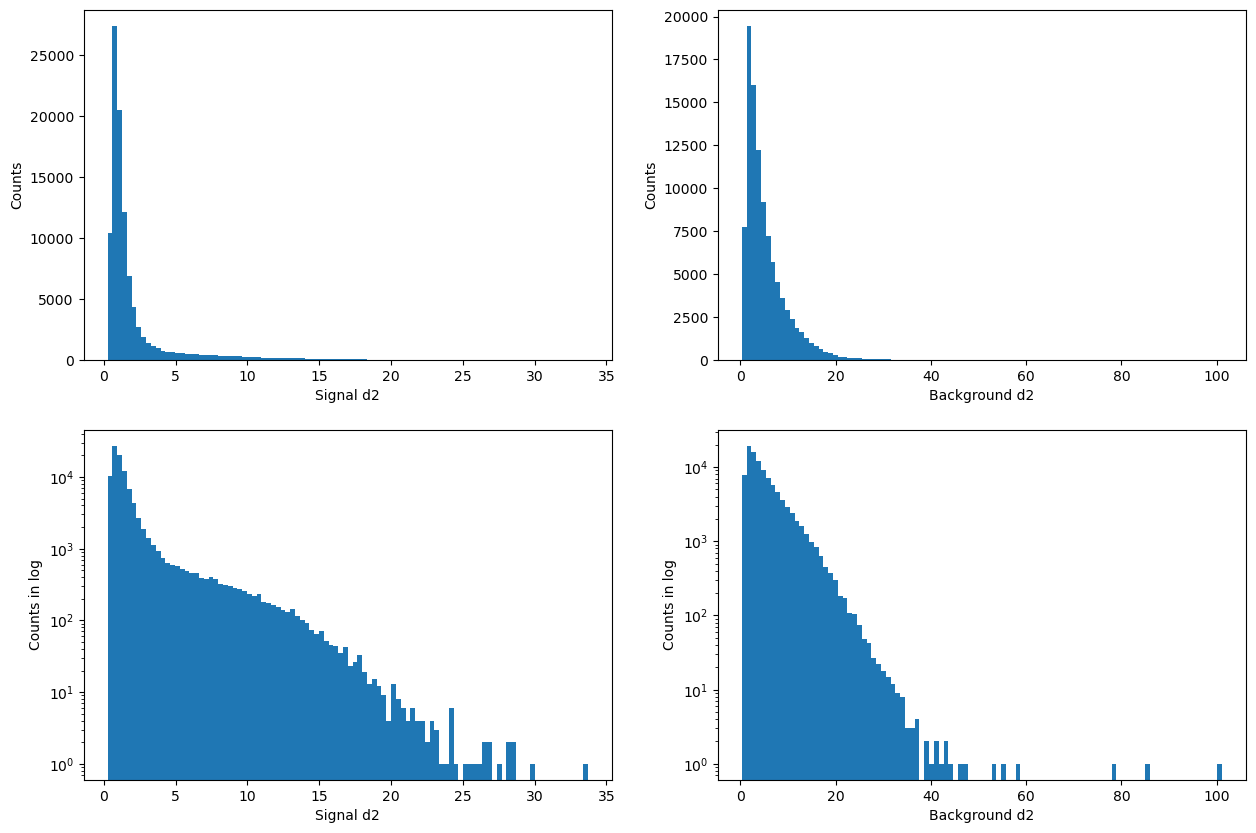

In [122]:
# seventh column -- d2

fig, a = plt.subplots(2, 2, figsize = (15, 10))
# histogram of signal
a[0,0].hist(higgs_data[:,6], bins = 100)
a[0,0].set_xlabel('Signal d2')
a[0,0].set_ylabel('Counts')
# histogram of background
a[0,1].hist(qcd_data[:,6], bins = 100)
a[0,1].set_xlabel('Background d2')
a[0,1].set_ylabel('Counts')
# log histogram of signal
a[1,0].hist(higgs_data[:,6], bins = 100)
a[1,0].set_xlabel('Signal d2')
a[1,0].set_yscale('log')
a[1,0].set_ylabel('Counts in log')
# log histogram of background
a[1,1].hist(qcd_data[:,6], bins = 100)
a[1,1].set_xlabel('Background d2')
a[1,1].set_yscale('log')
a[1,1].set_ylabel('Counts in log')

plt.show()

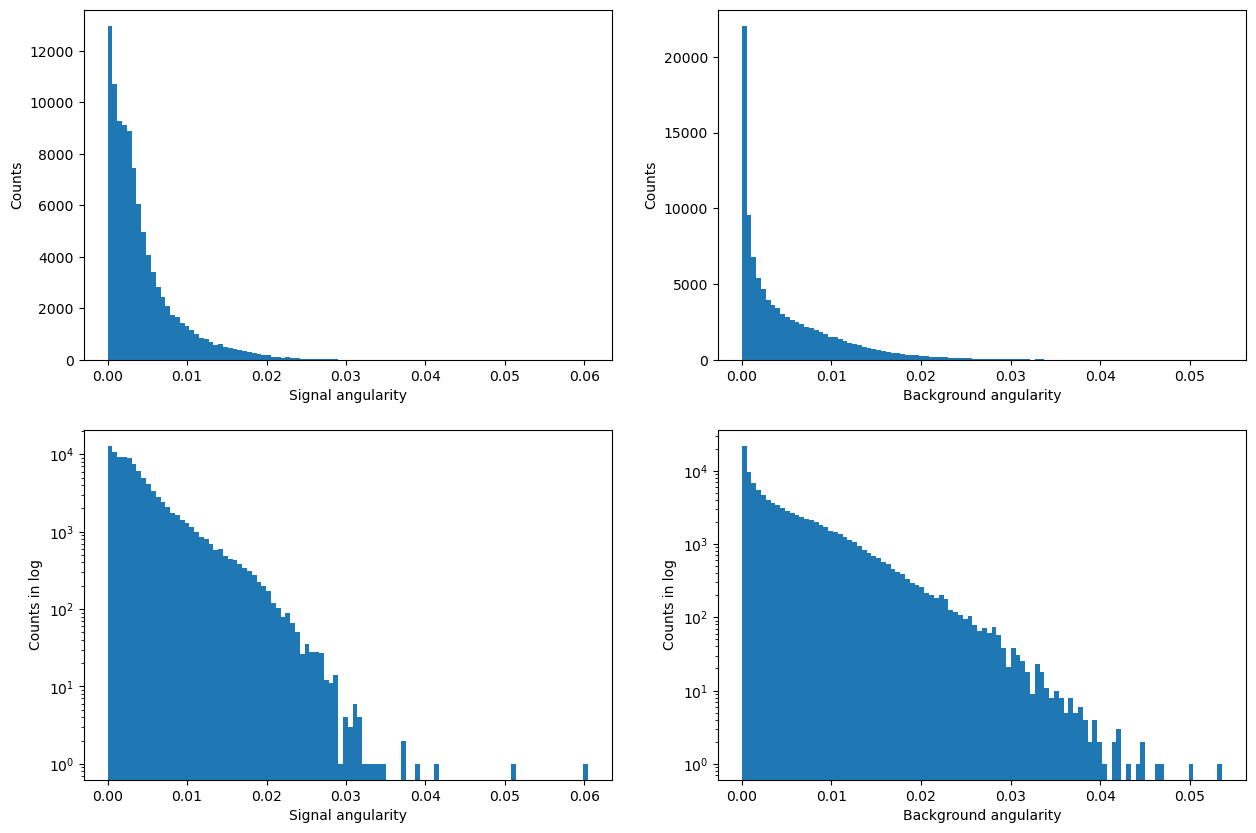

In [123]:
# eigth column -- angularity

fig, a = plt.subplots(2, 2, figsize = (15, 10))
# histogram of signal
a[0,0].hist(higgs_data[:,7], bins = 100)
a[0,0].set_xlabel('Signal angularity')
a[0,0].set_ylabel('Counts')
# histogram of background
a[0,1].hist(qcd_data[:,7], bins = 100)
a[0,1].set_xlabel('Background angularity')
a[0,1].set_ylabel('Counts')
# log histogram of signal
a[1,0].hist(higgs_data[:,7], bins = 100)
a[1,0].set_xlabel('Signal angularity')
a[1,0].set_yscale('log')
a[1,0].set_ylabel('Counts in log')
# log histogram of background
a[1,1].hist(qcd_data[:,7], bins = 100)
a[1,1].set_xlabel('Background angularity')
a[1,1].set_yscale('log')
a[1,1].set_ylabel('Counts in log')

plt.show()

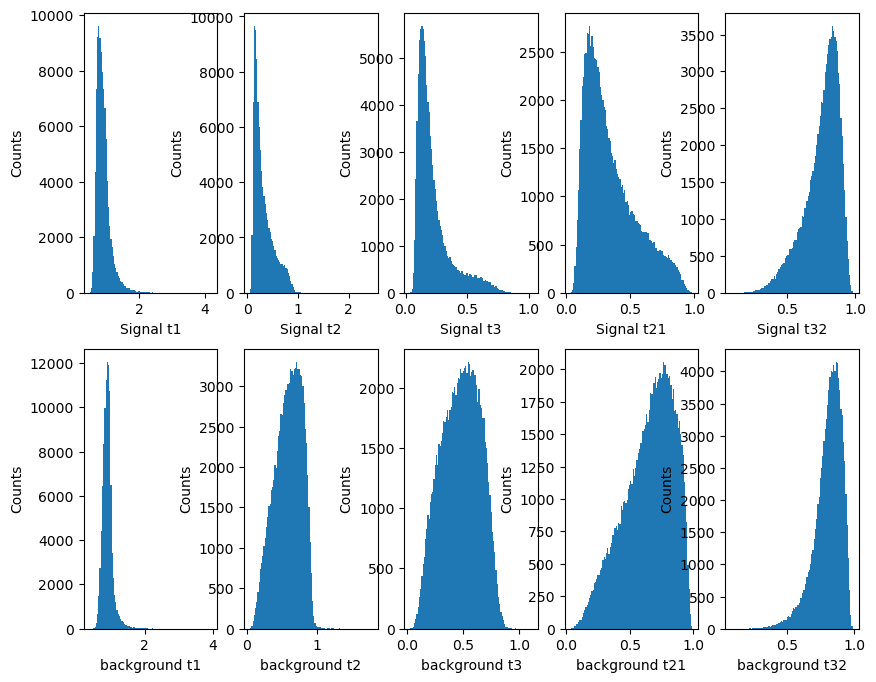

In [124]:
# nineth to thirteenth columns -- t1, t2, t3, t21, t32

fig, a = plt.subplots(2, 5, figsize = (10, 8))
# histogram of signal
a[0,0].hist(higgs_data[:,8], bins = 100)
a[0,0].set_xlabel('Signal t1')
a[0,0].set_ylabel('Counts')
a[0,1].hist(higgs_data[:,9], bins = 100)
a[0,1].set_xlabel('Signal t2')
a[0,1].set_ylabel('Counts')
a[0,2].hist(higgs_data[:,10], bins = 100)
a[0,2].set_xlabel('Signal t3')
a[0,2].set_ylabel('Counts')
a[0,3].hist(higgs_data[:,11], bins = 100)
a[0,3].set_xlabel('Signal t21')
a[0,3].set_ylabel('Counts')
a[0,4].hist(higgs_data[:,12], bins = 100)
a[0,4].set_xlabel('Signal t32')
a[0,4].set_ylabel('Counts')
# histogram of background
a[1,0].hist(qcd_data[:,8], bins = 100)
a[1,0].set_xlabel('background t1')
a[1,0].set_ylabel('Counts')
a[1,1].hist(qcd_data[:,9], bins = 100)
a[1,1].set_xlabel('background t2')
a[1,1].set_ylabel('Counts')
a[1,2].hist(qcd_data[:,10], bins = 100)
a[1,2].set_xlabel('background t3')
a[1,2].set_ylabel('Counts')
a[1,3].hist(qcd_data[:,11], bins = 100)
a[1,3].set_xlabel('background t21')
a[1,3].set_ylabel('Counts')
a[1,4].hist(qcd_data[:,12], bins = 100)
a[1,4].set_xlabel('background t32')
a[1,4].set_ylabel('Counts')

plt.show()

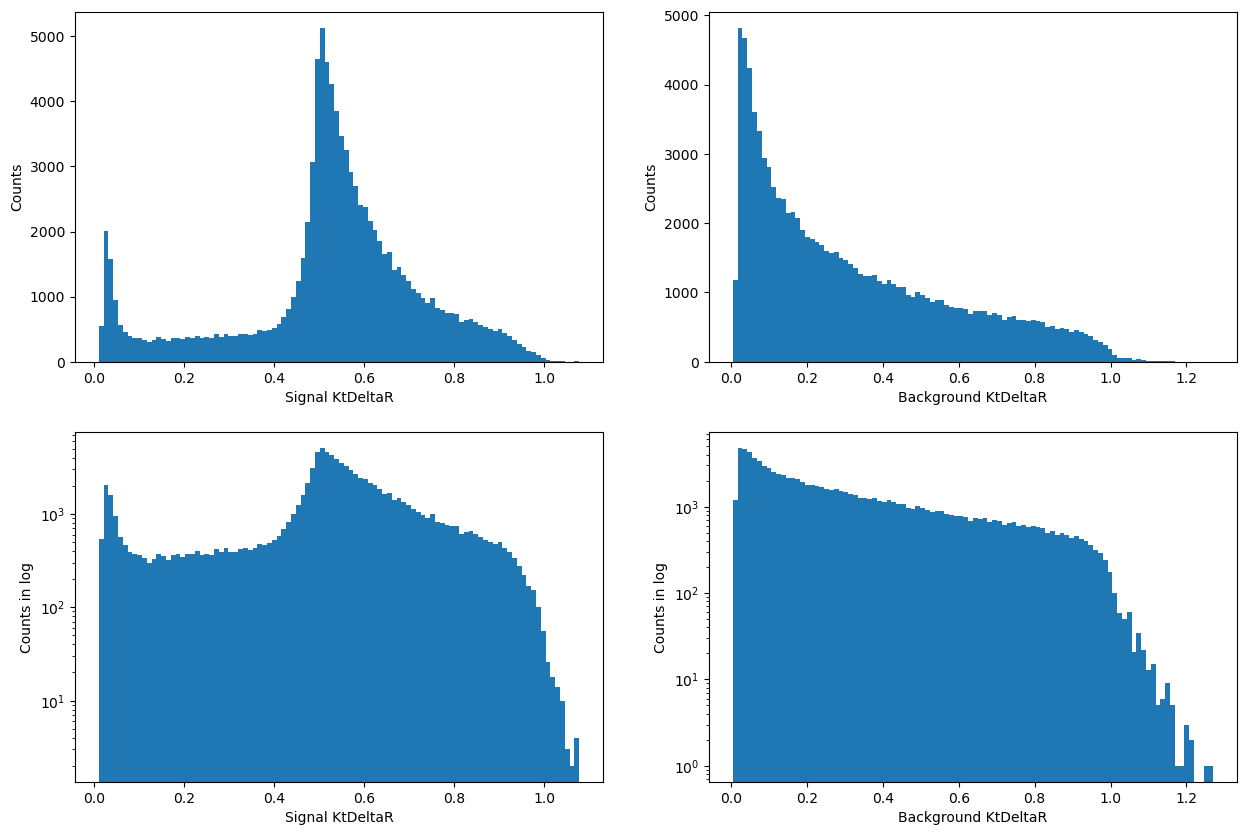

In [125]:
# fourteenth column -- KtDeltaR

fig, a = plt.subplots(2, 2, figsize = (15, 10))
# histogram of signal
a[0,0].hist(higgs_data[:,13], bins = 100)
a[0,0].set_xlabel('Signal KtDeltaR')
a[0,0].set_ylabel('Counts')
# histogram of background
a[0,1].hist(qcd_data[:,13], bins = 100)
a[0,1].set_xlabel('Background KtDeltaR')
a[0,1].set_ylabel('Counts')
# log histogram of signal
a[1,0].hist(higgs_data[:,13], bins = 100)
a[1,0].set_xlabel('Signal KtDeltaR')
a[1,0].set_yscale('log')
a[1,0].set_ylabel('Counts in log')
# log histogram of background
a[1,1].hist(qcd_data[:,13], bins = 100)
a[1,1].set_xlabel('Background KtDeltaR')
a[1,1].set_yscale('log')
a[1,1].set_ylabel('Counts in log')

plt.show()

# correlation functions

In [126]:
# signal-Higgs
new_dict1.corr()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
pt,1.000000,-0.002129,0.001585,0.175370,-0.254340,-0.463733,-0.052192,-0.087057,-0.035002,-0.077958,-0.088589,-0.067704,-0.007152,-0.128198
eta,-0.002129,1.000000,-0.000406,0.000956,0.002153,0.004534,-0.000151,0.004274,0.002319,0.001370,0.001221,0.000088,-0.000048,-0.000458
phi,0.001585,-0.000406,1.000000,-0.002895,-0.005504,-0.004968,0.003222,0.001009,-0.004121,-0.001214,0.001452,0.000322,0.003567,0.000358
mass,0.175370,0.000956,-0.002895,1.000000,0.813764,0.445566,-0.836983,0.037857,-0.019461,-0.698137,-0.811544,-0.710751,-0.135391,0.654055
ee2,-0.254340,0.002153,-0.005504,0.813764,1.000000,0.737763,-0.772951,-0.131983,0.230258,-0.537445,-0.665586,-0.639195,-0.213722,0.468551
ee3,-0.463733,0.004534,-0.004968,0.445566,0.737763,1.000000,-0.366714,0.062178,0.199961,0.006620,-0.153715,-0.068111,-0.393777,0.263007
d2,-0.052192,-0.000151,0.003222,-0.836983,-0.772951,-0.366714,1.000000,0.081458,-0.033893,0.692267,0.782655,0.728085,0.075884,-0.554474
angularity,-0.087057,0.004274,0.001009,0.037857,-0.131983,0.062178,0.081458,1.000000,-0.244415,0.058273,0.055166,0.152686,-0.000888,0.266979
t1,-0.035002,0.002319,-0.004121,-0.019461,0.230258,0.199961,-0.033893,-0.244415,1.000000,0.190188,0.106375,-0.094686,-0.223568,-0.301780
t2,-0.077958,0.001370,-0.001214,-0.698137,-0.537445,0.006620,0.692267,0.058273,0.190188,1.000000,0.927438,0.943797,-0.330452,-0.661620


relative significant combo:
t2-t3,
t2-t21,
t3-t21,
mass-ee2,

In [127]:
# background - qcd
new_dict2.corr()

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
pt,1.000000,0.001646,-0.002151,0.116106,-0.065045,-0.071166,0.044540,-0.006096,-0.015842,-0.015435,-0.012933,-0.010350,0.002034,-0.020723
eta,0.001646,1.000000,0.001982,0.000331,-0.000829,0.000016,0.003129,0.001901,0.001541,0.003722,0.001989,0.002678,-0.002362,0.002631
phi,-0.002151,0.001982,1.000000,0.001781,-0.000084,-0.001442,0.000616,0.002013,0.000068,0.003766,0.004418,0.003519,0.002664,-0.003412
mass,0.116106,0.000331,0.001781,1.000000,0.944705,0.823995,-0.609440,0.395267,0.047805,-0.518935,-0.597166,-0.571218,-0.369384,0.709354
ee2,-0.065045,-0.000829,-0.000084,0.944705,1.000000,0.888003,-0.660044,0.335057,0.161316,-0.519772,-0.613476,-0.621209,-0.412979,0.661513
ee3,-0.071166,0.000016,-0.001442,0.823995,0.888003,1.000000,-0.413854,0.346522,0.163273,-0.304939,-0.408181,-0.388633,-0.400095,0.533815
d2,0.044540,0.003129,0.000616,-0.609440,-0.660044,-0.413854,1.000000,-0.174517,-0.110423,0.505221,0.553272,0.600450,0.239771,-0.466225
angularity,-0.006096,0.001901,0.002013,0.395267,0.335057,0.346522,-0.174517,1.000000,0.013484,-0.069498,-0.099513,-0.090325,-0.109640,0.263082
t1,-0.015842,0.001541,0.000068,0.047805,0.161316,0.163273,-0.110423,0.013484,1.000000,0.285307,0.206263,-0.087536,-0.151472,-0.209706
t2,-0.015435,0.003722,0.003766,-0.518935,-0.519772,-0.304939,0.505221,-0.069498,0.285307,1.000000,0.934555,0.913813,0.057613,-0.675798


relative significant combo:
mass-ee2,
mass-ee3,
ee3-ee2,
t2-t3,
t2-t21,
t3-t21